# Calculate the tip step size distribution due to the filament dynamics

In [6]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate
import cmocean
import pandas as pd

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

In [16]:
# folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/Analysis_test/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.744_activityTime_750_simType_point'

folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/Analysis_test/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.59_activityTime_750_simType_point'

files = [file for file in os.listdir(folder) if file.endswith('hdf5')]

In [20]:
df_tip_disp = pd.DataFrame({})
df_tip_speed = pd.DataFrame({})

for file in files:
    
    filament = analysis.analysisTools(file = os.path.join(folder, file))
    
    constant_phase_indices = filament.find_constant_phase_indices()
    
    tip_disp_x = filament.derived_data['head pos x'][constant_phase_indices[1:]] - filament.derived_data['head pos x'][constant_phase_indices[0:-1]]
    tip_disp_y = filament.derived_data['head pos y'][constant_phase_indices[1:]] - filament.derived_data['head pos y'][constant_phase_indices[0:-1]]
    
    tip_disp = (tip_disp_x**2 + tip_disp_y**2)**(1/2)
    
    df_tip_disp = df_tip_disp.append(pd.DataFrame({'Tip displacement':tip_disp}))
    
    
    filament.compute_tip_velocity()
    df_tip_speed = df_tip_speed.append(pd.DataFrame({'Tip speed':filament.derived_data['tip speed']}))



In [18]:
df_tip_disp

,Tip displacement
0,51.698795
1,80.982962
2,71.454034
3,60.522040
4,86.016674
...,...
495,85.402289
496,56.266380
497,38.779606
498,85.401217


<IPython.core.display.Javascript object>


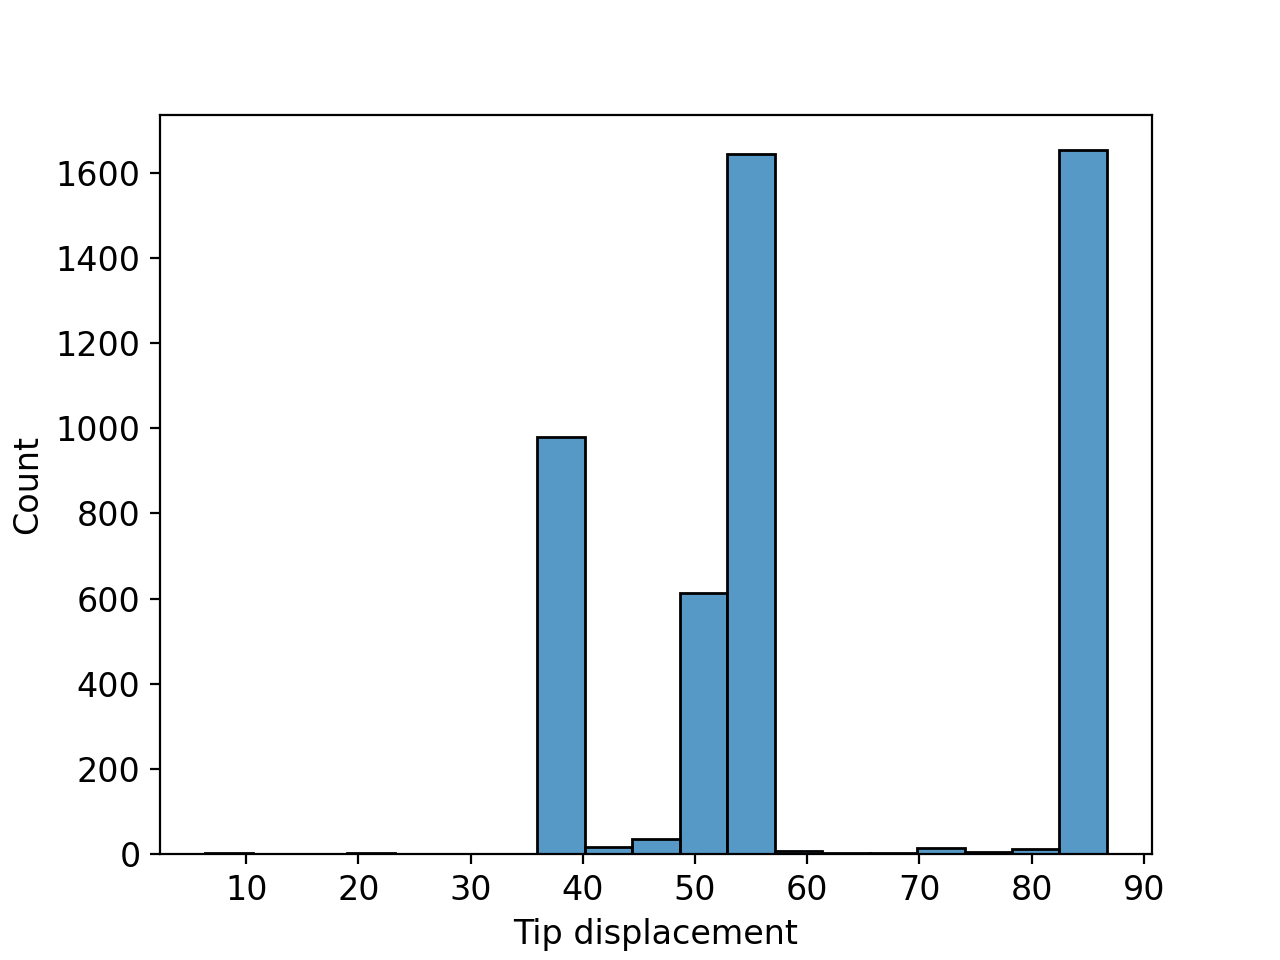

In [19]:
# Plot the distribution of tip displacements

plt.figure()
sns.histplot(data = df_tip_disp, x = 'Tip displacement')
plt.show()

<IPython.core.display.Javascript object>


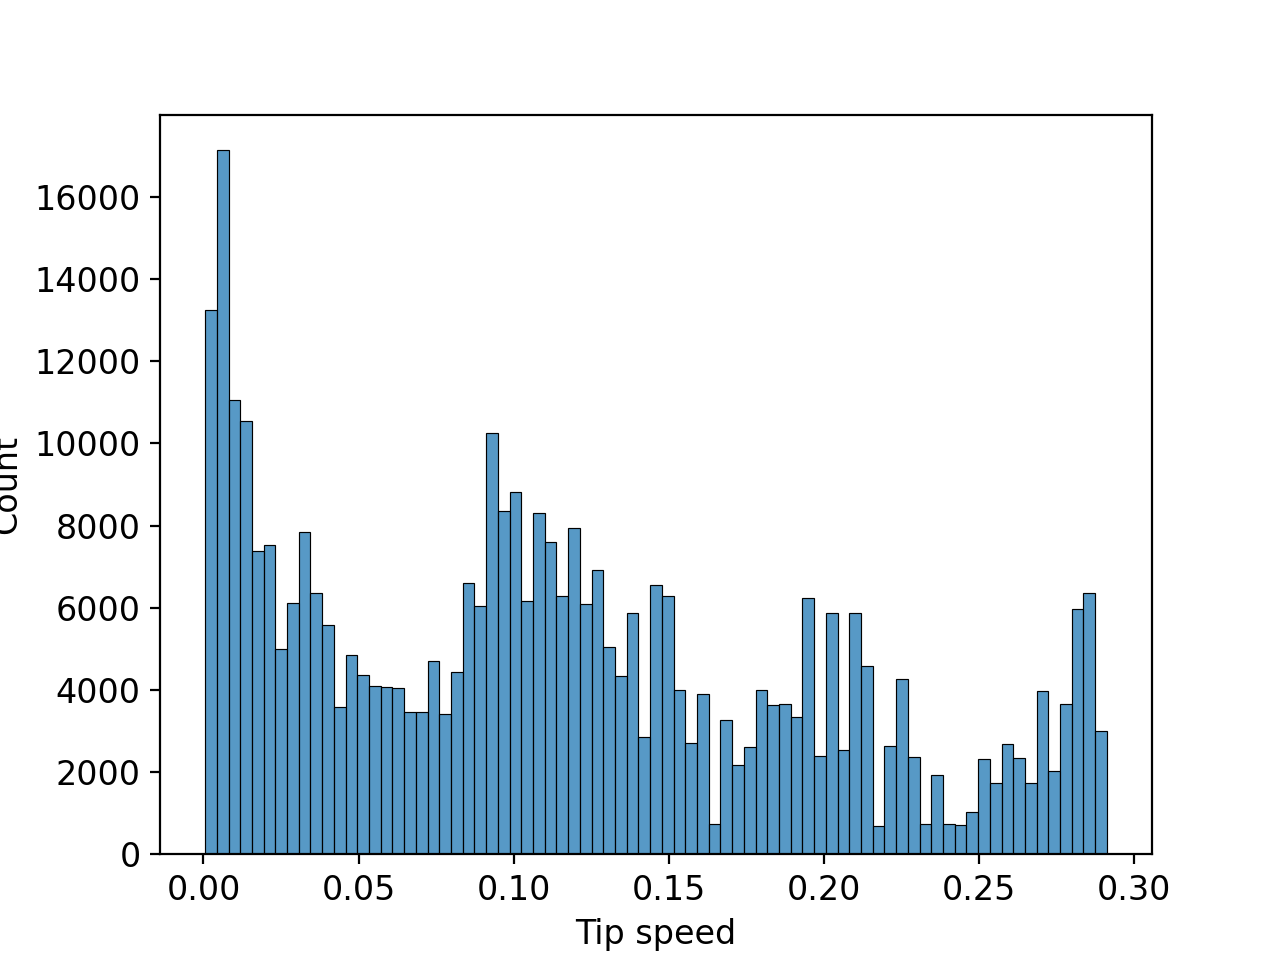

In [21]:
plt.figure()
sns.histplot(data = df_tip_speed, x = 'Tip speed')
plt.show()